## Handle Categorical missing value

### 1.Frequent Category Imputation
For only less missing values of features

In [2]:
import pandas as pd
import numpy as np

In [17]:
df=pd.read_csv('advance_house_train .csv', 
               usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [18]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [19]:
df.isnull().mean().sort_values(ascending=True)*100

SalePrice       0.000000
BsmtQual        2.534247
GarageType      5.547945
FireplaceQu    47.260274
dtype: float64

In [20]:
## BsmtQual and GarageType have very less no. of missing 
#value we can take most frequent value and replave them

##### Compute the frequency with each feature

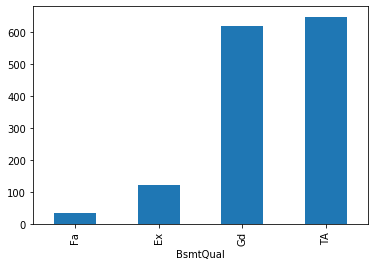

In [23]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values().plot.bar()

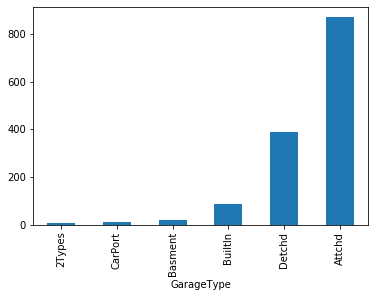

In [24]:
df.groupby(['GarageType'])['GarageType'].count().sort_values().plot.bar()

In [26]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [33]:
### Replacng functon 

def impute_nan(df,variable):
    most_frquent_cat=df[variable].value_counts().index[0]   ## OR .mode[0]
    df[variable].fillna(most_frquent_cat ,inplace=True)

In [38]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,feature)

In [39]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_mode,GarageType_mode
0,Gd,Gd,Attchd,208500,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,Attchd
2,Gd,TA,Attchd,223500,Gd,Attchd
3,TA,Gd,Detchd,140000,TA,Detchd
4,Gd,TA,Attchd,250000,Gd,Attchd


In [40]:
df.isnull().sum()

BsmtQual           0
FireplaceQu        0
GarageType         0
SalePrice          0
BsmtQual_mode      0
GarageType_mode    0
dtype: int64

#### Advantages and disadvantages of mea/median imputation

##### Advantages
1. Easy to implement
2. Faster way to obtain complete data set

#### Disadvantages
1. Cant use for high no. of missing values.
2. Scince we are usng for frequnt labels it may use them over represented way if there are many nans
3. it diistorts the relationship of the most frequent label

## 2. Adding a variable to capture nan

In [57]:
df=pd.read_csv('advance_house_train .csv', 
               usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [58]:
df['BsmtQual_capture']=np.where(df['BsmtQual'].isnull(),1,0)

In [59]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_capture
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [60]:
frequent=df['BsmtQual'].mode()[0]
frequent

'TA'

In [61]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [62]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_capture
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


 #### Suppose if you have more frequent categories, we just replace the nan with new category missing

In [76]:
df=pd.read_csv('advance_house_train .csv', 
               usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [77]:
def impute_nan(df,variable):
    df[variable+'_new']=np.where(df[variable].isnull(),'missing',df[variable])

In [78]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,feature)

In [79]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,GarageType_new,FireplaceQu_new
0,Gd,NaN,Attchd,208500,Gd,Attchd,missing
1,Gd,TA,Attchd,181500,Gd,Attchd,TA
2,Gd,TA,Attchd,223500,Gd,Attchd,TA
3,TA,Gd,Detchd,140000,TA,Detchd,Gd
4,Gd,TA,Attchd,250000,Gd,Attchd,TA


In [80]:
df=df.drop(['BsmtQual','GarageType','FireplaceQu'],axis=1)
df.head()

,SalePrice,BsmtQual_new,GarageType_new,FireplaceQu_new
0,208500,Gd,Attchd,missing
1,181500,Gd,Attchd,TA
2,223500,Gd,Attchd,TA
3,140000,TA,Detchd,Gd
4,250000,Gd,Attchd,TA


In [ ]:
## 3